Index(['Division', 'Calendar_Week', 'Paid_Views', 'Organic_Views',
       'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions',
       'Affiliate_Impressions', 'Overall_Views', 'Sales'],
      dtype='object')


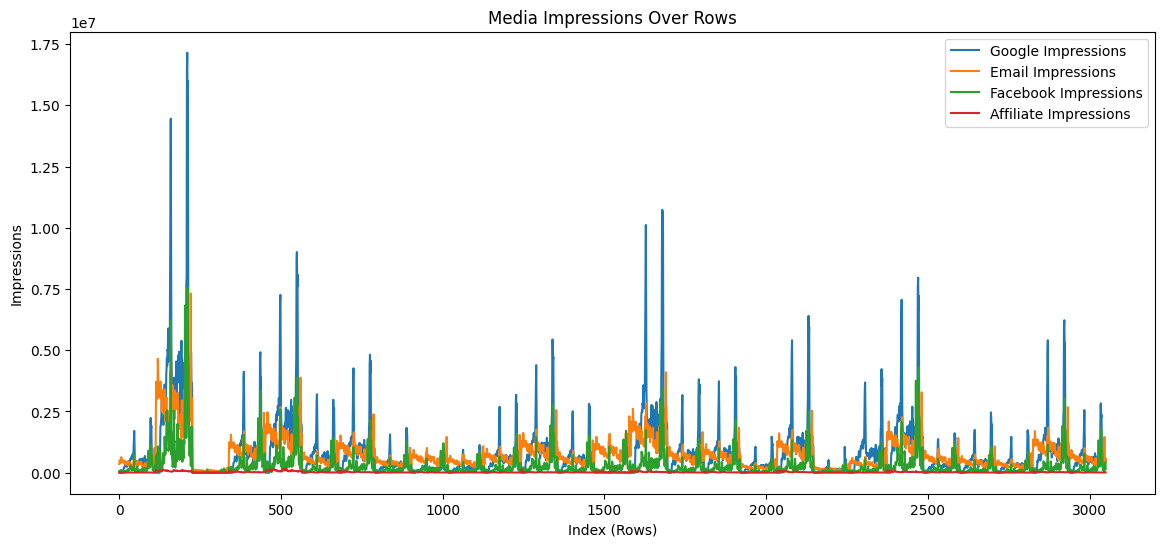

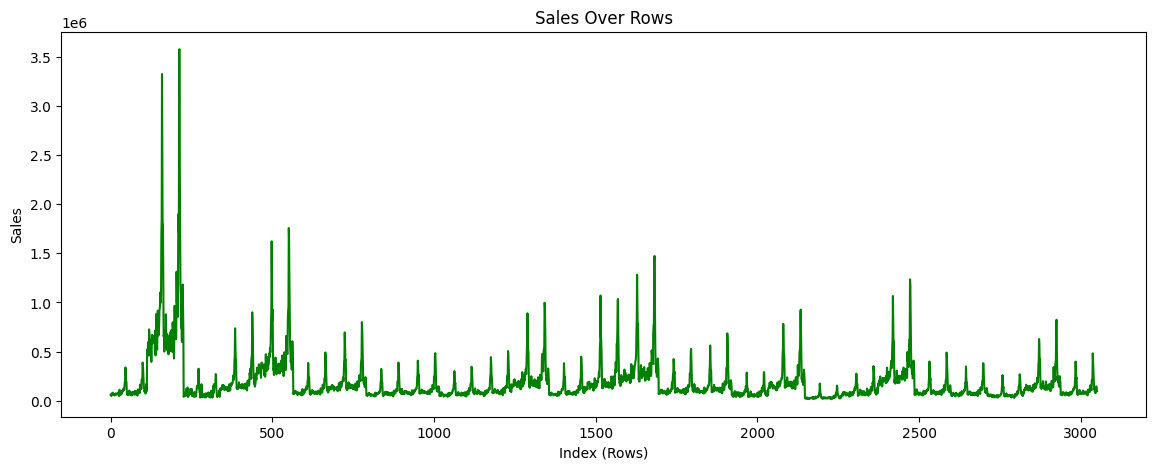


Model Performance:
R2 Score: 0.6422217957815549
RMSE: 114777.15000103286

Channel Importance:
            Media_Channel  Coefficient
0     Google_Impressions     0.044650
1      Email_Impressions     0.168798
2   Facebook_Impressions     0.198918
3  Affiliate_Impressions    -0.751070


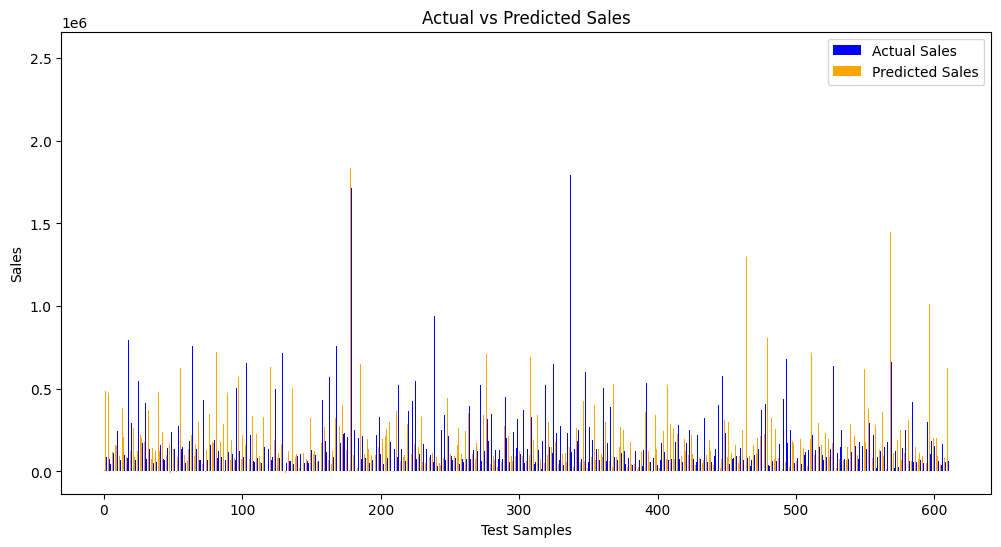

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load Dataset
df = pd.read_csv("smsd.csv")

# Check the columns
print(df.columns)

# Visualizing Impressions over time
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Google_Impressions'], label='Google Impressions')
plt.plot(df.index, df['Email_Impressions'], label='Email Impressions')
plt.plot(df.index, df['Facebook_Impressions'], label='Facebook Impressions')
plt.plot(df.index, df['Affiliate_Impressions'], label='Affiliate Impressions')
plt.xlabel('Index (Rows)')
plt.ylabel('Impressions')
plt.title('Media Impressions Over Rows')
plt.legend()
plt.show()

# Visualize Sales over rows
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Sales'], color='green')
plt.xlabel('Index (Rows)')
plt.ylabel('Sales')
plt.title('Sales Over Rows')
plt.show()

# Prepare Features and Target
X = df[['Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions']]
y = df['Sales']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Performance
print("\nModel Performance:")
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature Importance (Coefficients)
coef_df = pd.DataFrame({'Media_Channel': X.columns, 'Coefficient': model.coef_})
print("\nChannel Importance:\n", coef_df)

# Plot: Actual vs Predicted Sales (Bar Plot)
plt.figure(figsize=(12, 6))
index = np.arange(len(y_test))
bar_width = 0.35

plt.bar(index, y_test, bar_width, label='Actual Sales', color='blue')
plt.bar(index + bar_width, y_pred, bar_width, label='Predicted Sales', color='orange')

plt.xlabel('Test Samples')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()
